I think going with the mean is better as it captures the controversy of a look better and the median also seems to descretize the ratings which seems like loss of valuable information. 

Though there's that clearly that case when there's one person rating the looks.

In [1]:
from PIL import Image
import hdbscan
import time
import seaborn as sns
import pickle
import numpy as np
import pandas as pd
from umap import UMAP
from image_helpers import *
from tsne import image_scatter_plot
from sklearn.linear_model import LogisticRegression


import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
sns.set_context("poster")
%pylab inline

import warnings
warnings.filterwarnings('ignore')
pylab.rcParams['figure.figsize'] = (15, 15)

Populating the interactive namespace from numpy and matplotlib


count    5500.000000
mean        2.990891
std         0.688112
min         1.016667
25%         2.500000
50%         2.833333
75%         3.533333
max         4.750000
Name: mean_rating, dtype: float64
skew --  0.3741395890864243
kurtosis -- -0.6103667903222889


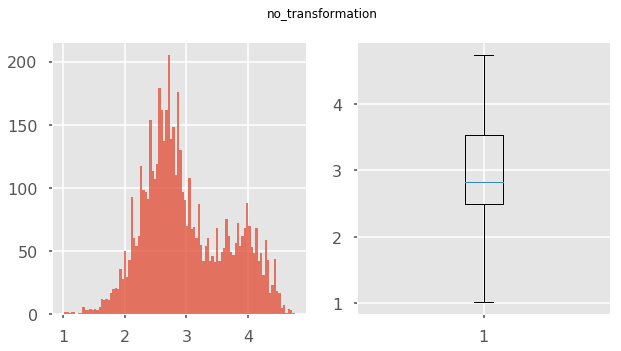

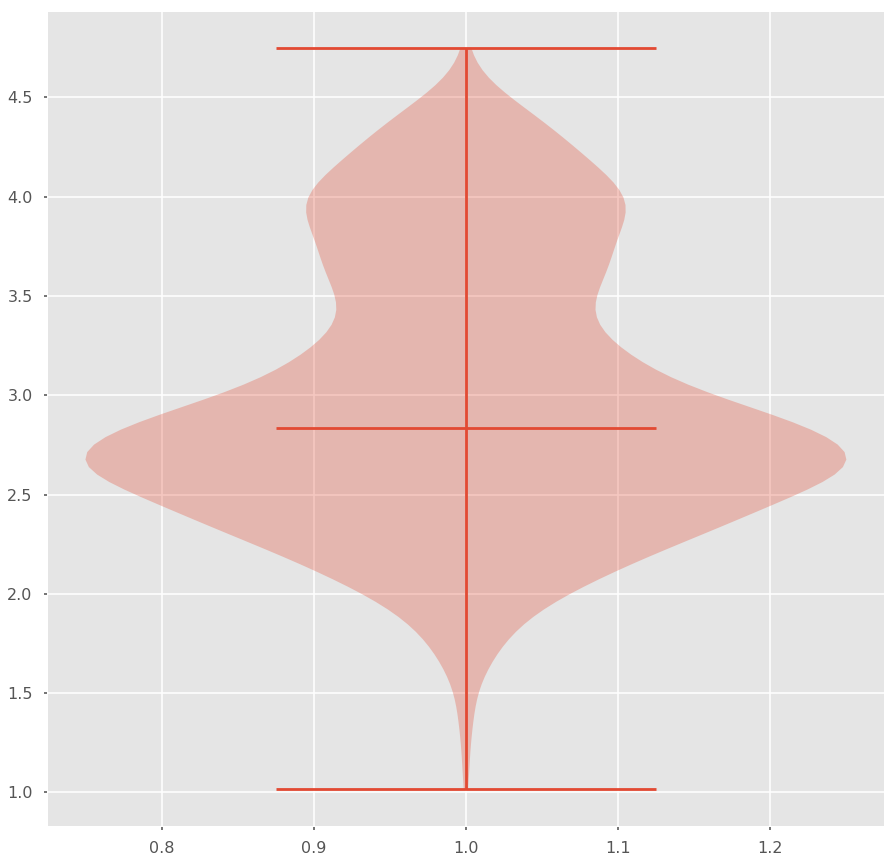

In [2]:
df_labels = pd.read_csv('../data/SCUT-FBP5500_v2/train_test_files/All_labels.txt', sep=' ', header=None)
df_labels.columns = ['file_name', 'mean_rating']
plot_distribution(df_labels['mean_rating'])

count    330000.000000
mean          2.990891
std           0.942182
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Rating, dtype: float64
skew --  0.04372230398693984
kurtosis -- 0.008906320878518947


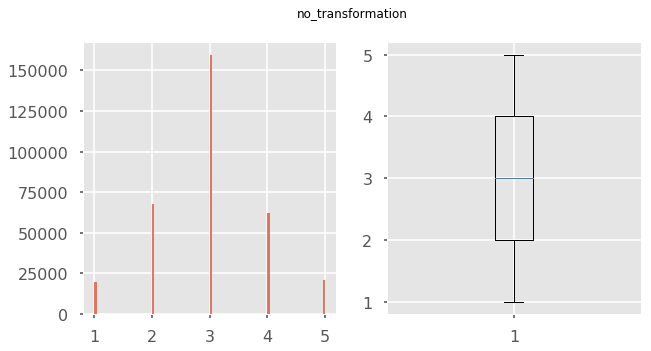

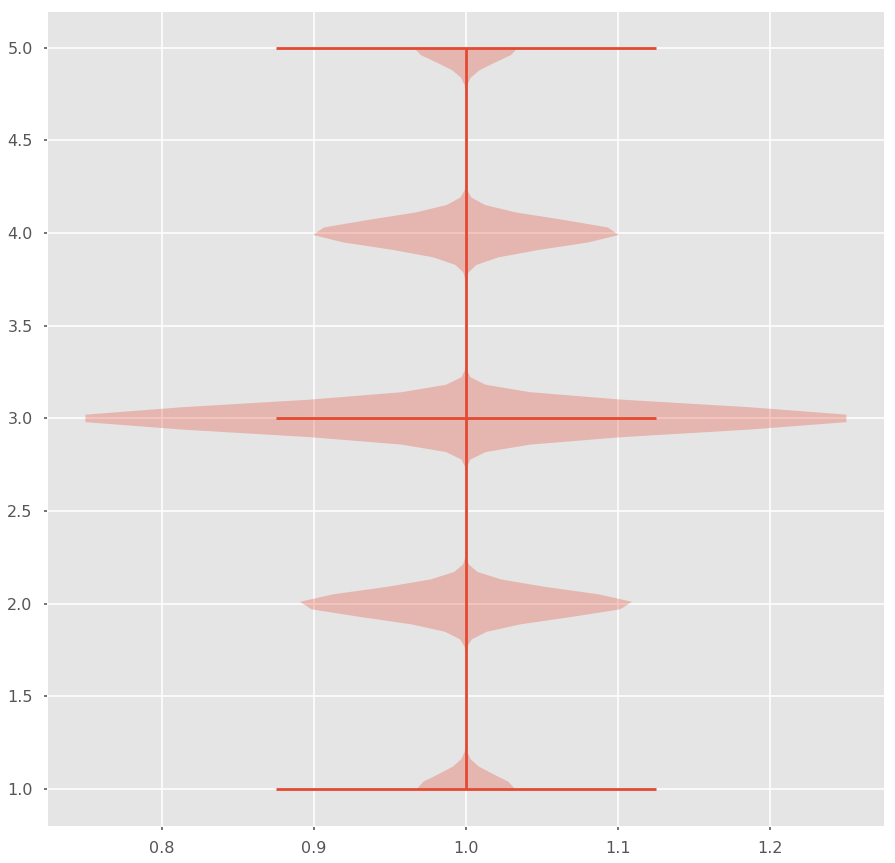

In [6]:
df = pd.DataFrame().from_csv(
        '../data/filename_to_rating_lookup_ALL.csv', 
        index_col=[0]
    ) 

plot_distribution(df['Rating'])

count    5500.000000
mean        3.056909
std         0.706423
min         1.000000
25%         3.000000
50%         3.000000
75%         3.500000
max         5.000000
Name: Rating, dtype: float64
skew --  -0.0006558747890151284
kurtosis -- -0.13852954510013138


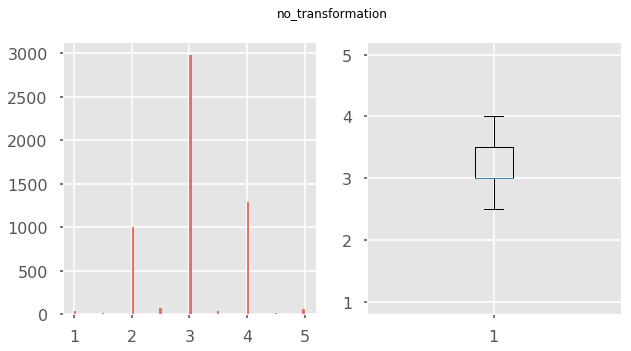

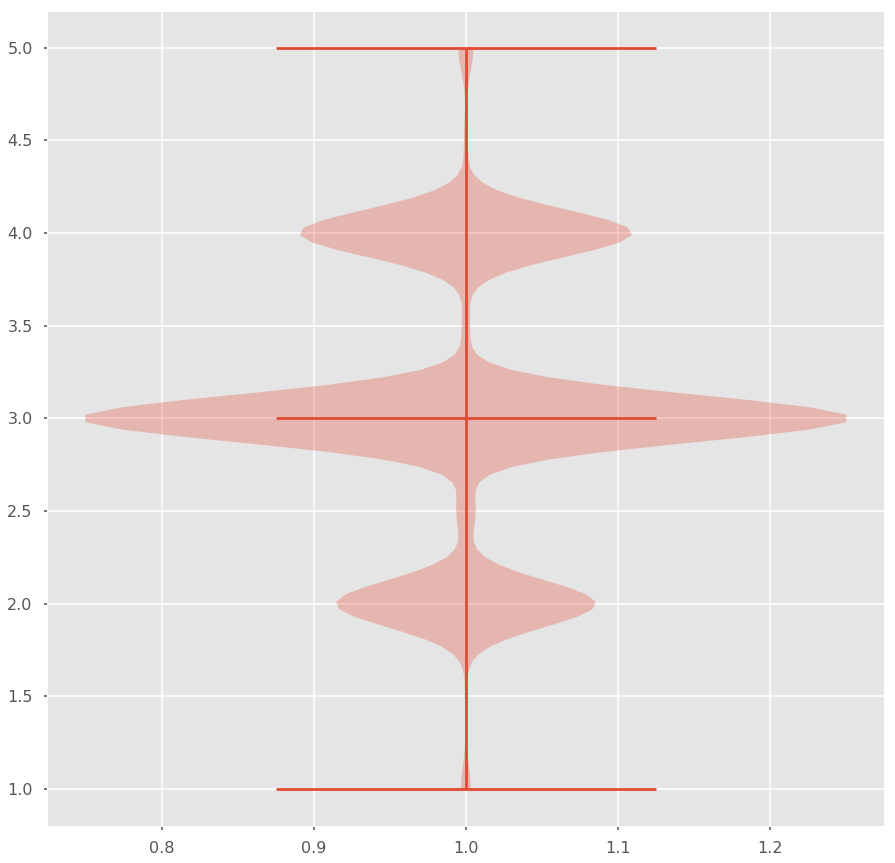

In [7]:
df_all_ratings = pd.read_excel('../data/SCUT-FBP5500_v2/All_Ratings.xlsx')
plot_distribution(df_all_ratings.groupby(('Filename'))['Rating'].median())